In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
s = pd.Series([i for i in xrange(1,6)])

In [12]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [14]:
df

,A,B,C,D
2013-01-01,0.715314,0.622941,-1.720918,-2.008962
2013-01-02,-0.939153,-0.350472,0.415322,0.606744
2013-01-03,-1.489454,-0.855790,0.143121,-1.393623
2013-01-04,-0.362528,-0.300295,0.093503,0.334591
2013-01-05,-0.617542,-0.504957,0.769668,0.411071
2013-01-06,0.248733,0.494208,0.023965,-3.171309


In [41]:
df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.date_range('20171006',periods=4),
    'C' : pd.Series(1,index=list(range(4)),dtype='float64'),
    'D' : np.array([3]*4,dtype='int32'),
    'E' : pd.Categorical(['test','train','test',"train"]),
    'F' : 'foo',
})
df2


,A,B,C,D,E,F
0,1.0,2017-10-06,1.0,3,test,foo
1,1.0,2017-10-07,1.0,3,train,foo
2,1.0,2017-10-08,1.0,3,test,foo
3,1.0,2017-10-09,1.0,3,train,foo


In [42]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [43]:
df2.sort_index(axis=0,ascending=False)

,A,B,C,D,E,F
3,1.0,2017-10-09,1.0,3,train,foo
2,1.0,2017-10-08,1.0,3,test,foo
1,1.0,2017-10-07,1.0,3,train,foo
0,1.0,2017-10-06,1.0,3,test,foo


In [44]:
df2.sort_values(by='E')

,A,B,C,D,E,F
0,1.0,2017-10-06,1.0,3,test,foo
2,1.0,2017-10-08,1.0,3,test,foo
1,1.0,2017-10-07,1.0,3,train,foo
3,1.0,2017-10-09,1.0,3,train,foo


In [51]:
df2.loc[:,['B','E']]

,B,E
0,2017-10-06,test
1,2017-10-07,train
2,2017-10-08,test
3,2017-10-09,train


In [61]:
df2.loc[:,['B','E']]

,B,E
0,2017-10-06,test
1,2017-10-07,train
2,2017-10-08,test
3,2017-10-09,train


In [62]:
df2.loc[0,'E']

'test'

In [149]:
from re import sub
from sklearn.datasets import load_iris
ds = load_iris()
colnames = [sub('[\s\(\)]|cm','',n) for n in ds.feature_names]
iris = pd.DataFrame(ds.data,columns=colnames)
iris = iris.assign(target = ds.target)
iris.head(5)

,sepallength,sepalwidth,petallength,petalwidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


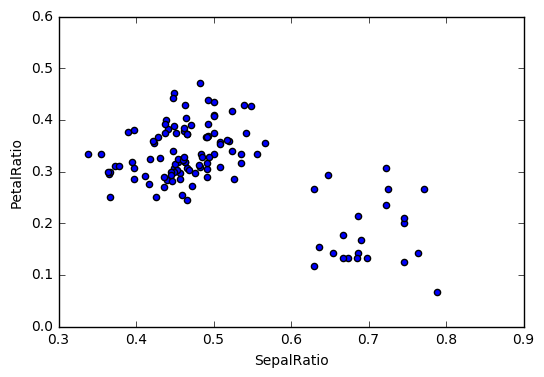

In [144]:
%matplotlib inline
(iris.query("sepallength > 5")
.assign(SepalRatio = lambda x: x.sepalwidth / x.sepallength,
        PetalRatio = lambda x: x.petalwidth / x.petallength)
.plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

In [140]:
left = pd.DataFrame({'key':['A','B','C'], 'lval':[1,2,6]})
right = pd.DataFrame({'key':['A','B'], 'rval':[4,5]})
left
pd.merge(left,right,on="key")

,key,lval,rval
0,A,1,4
1,B,2,5
